## Data science assessment - Fraud data

### High-level problem statement
E-commerce websites often transact huge amounts of money. Whenever a huge amount of money is moved, there is a high risk of users performing fraudulent activities, e.g. using stolen credit cards, laundering money, etc. 

### Objective
The goal of this challenge is to build a machine learning model that predicts the probability that the first transaction of a new user is fraudulent.

### Details
Electronica is an e-commerce site that sells wholesale electronics. You have been contracted to build a model that predicts whether a given transaction is fraudulent or not. You only have information about each user’s first transaction on Electronica’s website. 

### Solution
- Setting up this problem as a classical binary classification (fraud vs. no fraud)
- Metric of evaluation: 
    - This classification problem is interesting because of the class imbalance. As such, we cannot rely only on the accuracy of classification. As such, we account for both 'true positives' and 'true negatives'.
    - Total monetary loss calculated using the following logic: 
        - If you fail to identify a fraudulent transaction, Electronica loses money equivalent to the price of the fraudulently purchased product. 
        - If you incorrectly flag a real transaction as fraudulent, it inconveniences the Electronica customers whose valid transactions are flagged—a cost your client values at USD 8.

### Experiments
- Since number of fraudulent transactions is sparse, these kind of problems exhibit class imbalance. Experimenting with imblearn to handle the imbalance.
- Experimenting with two approaches to solve the problem -  
    - using Random Forest Classifier, without balancing, as the baseline model and 
    - using Balanced random forest to achieve a better performance.
- The total data is split into 'train' and 'test' datasets. The holdout dataset is used for testing the performance.

### Other details
- Along with this notebook, there are other notebooks in the folder that were used for experiments and saving desired implementations as python scripts. Those python scripts are used in this notebook.
- Steps to apply the model on the new dataset (hold out as mentioned in the problem description) is detailed in the last cell of this notebook.
- As a sample performance check, the entire dataset is used as test data in the last cell.

In [7]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## 1. Data ingestion

In [8]:
from myScripts.dataingestion import join_datasets
output_path = 'Analysis_dataset.csv' ## using the pre-saved file

## Need to run this step to generate it
# analysis_df = join_datasets('Candidate_tech_evaluation_candidate_copy_data science_fraud.csv',
#                             'Candidate_tech_evaluation_candidate_copy_datascience_IpAddress_to_Country.xlsx', output_path)
# analysis_df.head()

## 2. Feature Engineering

In [21]:
from myScripts import featureengineering
feature_df = featureengineering.create_features(output_path)
feature_df.head()

,,ratio_fraud_device_id,num_trans_device_id,ratio_fraud_country,num_trans_country,ratio_fraud_sex,num_trans_sex,age,ratio_fraud_age,num_trans_age,ratio_fraud_browser,num_trans_browser,ratio_fraud_source,num_trans_source,purchase_value,class,time_latency,country,sex,browser,source
user_id,device_id,,,,,,,,,,,,,,,,,,,,
285108,HZAKVUFTDOSFD,0.0,2.0,0.096830,46184.0,0.095442,70126,49,0.056534,1079.0,0.099441,48652,0.105643,24242,31,0,1377.683333,167,1,0,1
369076,HZAKVUFTDOSFD,0.0,2.0,0.115188,2344.0,0.095442,70126,43,0.084140,2686.0,0.091743,19620,0.091696,47461,40,0,1372.683333,30,1,4,0
131009,XGQAJSOUJIZCC,0.0,1.0,0.103911,3580.0,0.091671,49874,21,0.079291,2989.0,0.086107,29138,0.090109,48297,31,0,1888.400000,166,0,2,2
328855,VCCTAYDCWKZIY,0.0,1.0,0.096830,46184.0,0.095442,70126,26,0.076906,4460.0,0.086107,29138,0.105643,24242,16,0,611.483333,167,1,2,1
229053,MFFIHYNXCJLEY,0.0,1.0,0.091589,3341.0,0.095442,70126,34,0.088694,5006.0,0.099441,48652,0.090109,48297,29,0,44.883333,86,1,0,2


## 3. Create models and compare performance using test data

In [28]:
from myScripts.apply_classifier_model import apply_train_test_split

from myScripts.apply_classifier_model import apply_RF_classifier
from myScripts.apply_classifier_model import apply_balanced_RF_classifier

from myScripts.apply_classifier_model import plot_confusion_matrix
from myScripts.apply_classifier_model import calculate_total_loss
from myScripts.apply_classifier_model import load_models
from sklearn.metrics import confusion_matrix

## Train and test split
X_train, X_test, y_train, y_test = apply_train_test_split(feature_df, test_size = 0.4)

## Create and save models
RF_model = apply_RF_classifier(X_train, y_train, 'RF_model.joblib')

## Create and save models
BRF_model = apply_balanced_RF_classifier(X_train, y_train, 'BRF_model.joblib')

In [29]:
X_train.head()

,,ratio_fraud_device_id,num_trans_device_id,ratio_fraud_country,num_trans_country,ratio_fraud_sex,num_trans_sex,age,ratio_fraud_age,num_trans_age,ratio_fraud_browser,num_trans_browser,ratio_fraud_source,num_trans_source,purchase_value,time_latency,country,sex,browser,source
user_id,device_id,,,,,,,,,,,,,,,,,,,
281619,SWYHAWEXPEECF,0.0,1.0,0.115188,2344.0,0.091671,49874,30,0.090461,5074.0,0.086107,29138,0.091696,47461,51,1671.833333,30,0,2,0
511,PAOODQAWRAMZI,0.0,1.0,0.096830,46184.0,0.091671,49874,41,0.097627,3329.0,0.086107,29138,0.091696,47461,37,1266.733333,167,0,2,0
123853,NMCDFTPILZOQQ,0.0,1.0,0.085711,9532.0,0.095442,70126,36,0.120232,4824.0,0.099441,48652,0.091696,47461,53,1970.133333,34,1,0,0
164585,ZMQLQIPVJIPED,0.0,1.0,0.096600,5735.0,0.095442,70126,42,0.107107,3025.0,0.086107,29138,0.090109,48297,32,575.866667,82,1,2,2
328691,XYMOKAOPTTKCP,0.0,1.0,0.085711,9532.0,0.095442,70126,39,0.096538,3957.0,0.099441,48652,0.091696,47461,25,471.150000,34,1,0,0


In [34]:
y_train.head()

user_id  device_id    
281619   SWYHAWEXPEECF    0
511      PAOODQAWRAMZI    0
123853   NMCDFTPILZOQQ    0
164585   ZMQLQIPVJIPED    0
328691   XYMOKAOPTTKCP    0
Name: class, dtype: int64

Normalized confusion matrix
[[0.995932 0.004068]
 [0.065775 0.934225]]


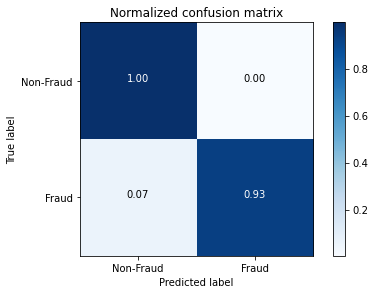

In [16]:
# Predict the values using the RF Classifier
# Load from the pickled file
RF_model = load_models('RF_model.joblib')
RF_y_predicted = RF_model.predict(X_test)

## Predict probablities of RF Classifier
RF_y_pred_prob = RF_model.predict_proba(X_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, RF_y_predicted)
np.set_printoptions(precision=6)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Non-Fraud', 'Fraud'], normalize=True,
                      title='Normalized confusion matrix')

Normalized confusion matrix
[[9.860278e-01 1.397219e-02]
 [8.918618e-04 9.991081e-01]]


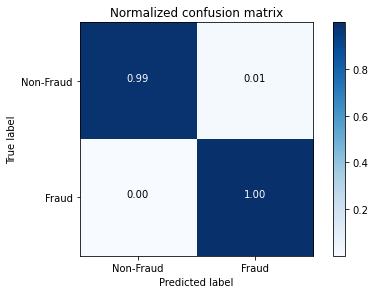

In [17]:
# Predict the values using the Balanced RF Classifier
# Load from the pickled file
BRF_model = load_models('BRF_model.joblib')

# Predict the values using the Decision Tree Classifier
BRF_y_predicted = BRF_model.predict(X_test)

## Predict probablities of Decision Tree Classifier
BRF_y_pred_prob = BRF_model.predict_proba(X_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, BRF_y_predicted)
np.set_printoptions(precision=6)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Non-Fraud', 'Fraud'], normalize=True,
                      title='Normalized confusion matrix')

In [18]:
# Calculate total loss in dollars using DT classifier
print('Total loss in dollar amounts using RF classifier = ', calculate_total_loss(X_test, y_test, RF_y_predicted))

# Calculate total loss in dollars using RF classifier
print('Total loss in dollar amounts using balanced RF classifier = ', calculate_total_loss(X_test, y_test, BRF_y_predicted))

Total loss in dollar amounts using RF classifier =  12069.0
Total loss in dollar amounts using balanced RF classifier =  4997.0


#### Clearly balanced random forest performs better than the regular method.

Normalized confusion matrix
[[0.98629 0.01371]
 [0.      1.     ]]


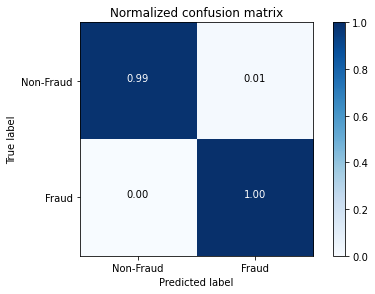

In [19]:
## 5. Applying test on the new dataset

# new_data_path = <new_data_path>
# output_path = <output_path>

# from myScripts.dataingestion import join_datasets
# new_analysis_df = join_datasets(path_to_new_data,
#                             'Candidate_tech_evaluation_candidate_copy_datascience_IpAddress_to_Country.xlsx', output_path)
# new_analysis_df.head()

# from myScripts import featureengineering
# new_feature_df = featureengineering.create_features(output_path)



## in this case we'll use a subset of the training dataset
subset_df = feature_df.sample(frac = 0.5)
BRF_y_predicted_new = BRF_model.predict(subset_df.drop('class', axis = 1))


## Predict probablities of balanced random forest Classifier
BRF_y_pred_prob_new = BRF_model.predict_proba(subset_df.drop('class', axis = 1))

# Compute confusion matrix
cnf_matrix = confusion_matrix(subset_df['class'], BRF_y_predicted_new)
np.set_printoptions(precision=6)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Non-Fraud', 'Fraud'], normalize=True,
                      title='Normalized confusion matrix')

In [20]:
# Calculate total loss in dollars using RF classifier
print('Total loss in dollar amounts using balanced RF classifier = ', calculate_total_loss(subset_df.drop('class', axis = 1), 
                                                                                           subset_df['class'], 
                                                                                           BRF_y_predicted_new))

Total loss in dollar amounts using balanced RF classifier =  5960.0
